In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn .pipeline import Pipeline
import numpy as np


In [2]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\housing.csv (1)\housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.isnull().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [6]:
data["total_bedrooms"]=data["total_bedrooms"].fillna(data["total_bedrooms"].mean())

In [7]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
data["longitude"].value_counts()

longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: count, Length: 844, dtype: int64

In [9]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
x=data.drop(columns=["median_house_value"],axis=1)
y=data["median_house_value"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [12]:
l=LabelEncoder()

In [13]:
x_train['ocean_proximity'] = l.fit_transform(x_train['ocean_proximity'])
x_test['ocean_proximity'] = l.transform(x_test['ocean_proximity'])


In [14]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,0


# befor ouliers 

<Axes: >

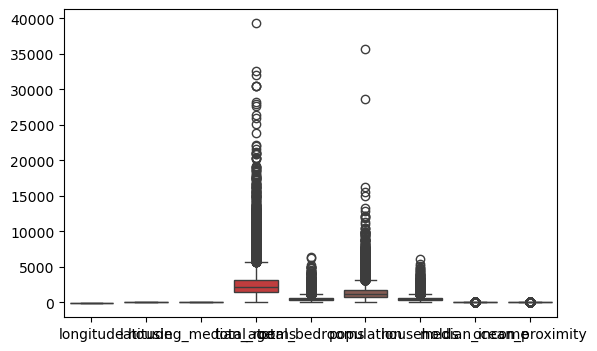

In [16]:
col=[var for var in x_train.columns]
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(x_train[col])

<Axes: ylabel='total_rooms'>

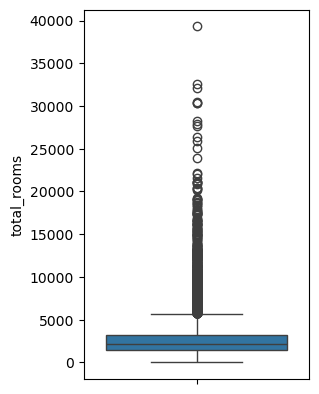

In [17]:

plt.subplot(121)
sns.boxplot(x_train["total_rooms"])

<Axes: ylabel='total_bedrooms'>

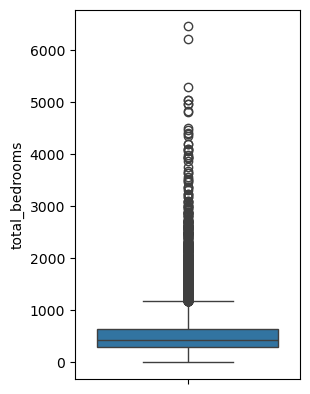

In [18]:
plt.subplot(121)
sns.boxplot(x_train["total_bedrooms"])

<Axes: ylabel='total_rooms'>

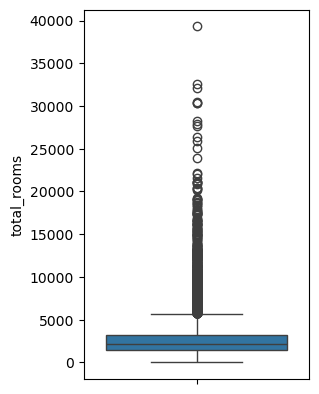

In [19]:
plt.subplot(121)
sns.boxplot(x_train["total_rooms"])

<Axes: ylabel='population'>

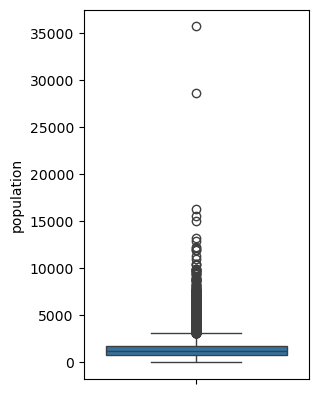

In [20]:
plt.subplot(121)
sns.boxplot(x_train["population"])

<Axes: ylabel='households'>

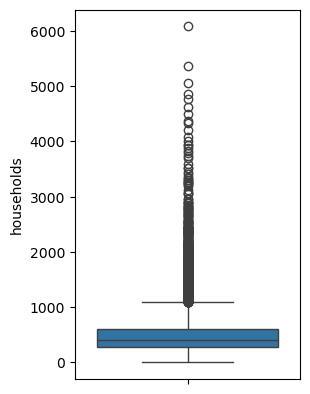

In [21]:
plt.subplot(121)
sns.boxplot(x_train["households"])

In [22]:
for col in x_train.columns:
    q1 = x_train[col].quantile(0.25)
    q3 = x_train[col].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # capping data
    x_train[col]=np.where(
        x_train[col]>upper_limit,
         upper_limit,
        np.where(
         x_train[col]<lower_limit,
            lower_limit,
            x_train[col]
            
        )
    )
    
    

# after outliers 

<Axes: ylabel='households'>

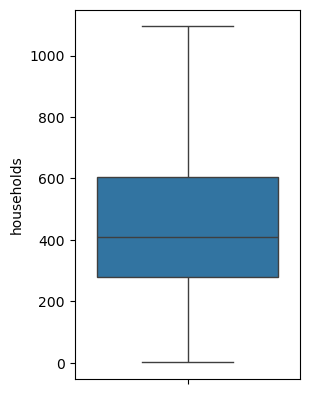

In [24]:
plt.subplot(121)
sns.boxplot(x_train["households"])

<Axes: ylabel='total_rooms'>

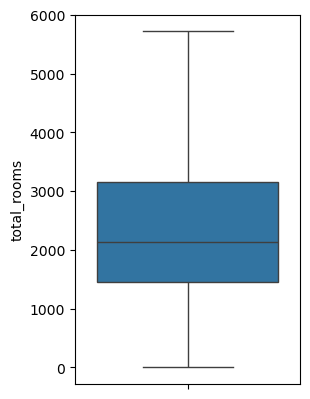

In [25]:
plt.subplot(121)
sns.boxplot(x_train["total_rooms"])

In [82]:
l=LinearRegression()

In [84]:
l.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
pred=l.predict(x_test)

In [94]:
pred

array([ 77447.86765093, 148391.00735802, 253307.63935922, ...,
       465828.59302668, 125526.25684805, 170626.78233005])

In [96]:
score=r2_score(pred,y_test)

In [98]:
score

0.49472920003365817